<a href="https://colab.research.google.com/github/harshvardhan-khachane/AI-Generated-Image-Detection-HarshvardhanK/blob/main/AI_Generated_Image_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading testing and training data
df_train = pd.read_csv('/content/drive/MyDrive/VLG/train (1).csv')
df_test = pd.read_csv('/content/drive/MyDrive/VLG/test (1).csv')

In [ ]:
#Determining features and target of training and testing data
Xo_Train = df_train.iloc[:,1:1201]
scaler = MinMaxScaler()
# Fit and transform the data
Xo_train = scaler.fit_transform(Xo_Train)
xo_Test = df_test.iloc[:,1:1201]
Xo_test = scaler.fit_transform(xo_Test)
print("Test data shape:", Xo_test.shape)
yo_train = df_train.iloc[:,0]
Yo_test = df_test.iloc[:,0]


Test data shape: (2250, 1200)


In [ ]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xo_train, yo_train, test_size=0.2, random_state=42)

# Printing the shapes of each set
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (4200, 1200) (4200,)
Testing set shape: (1050, 1200) (1050,)


In [ ]:
#Naive Bayes Classifier
model_NB = GaussianNB()
model_NB.fit(X_train,y_train)
print("Naive Bayes Classifier Accuracy Score: "+str(accuracy_score(y_test, model_NB.predict(X_test))*100)+"%")
accnb=accuracy_score(y_test, model_NB.predict(X_test))*100

Naive Bayes Classifier Accuracy Score: 62.1904761904762%


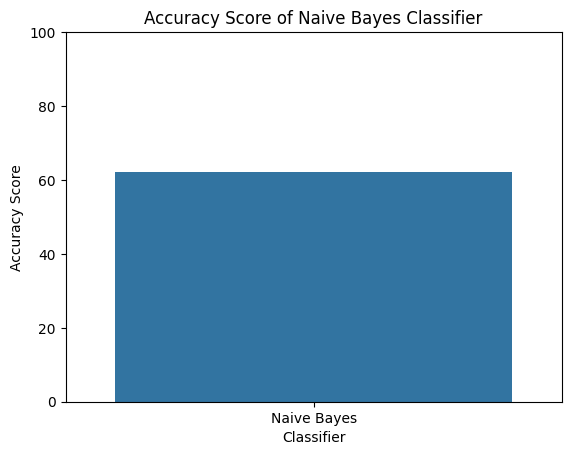

In [ ]:
# Create a bar plot using Seaborn
sns.barplot(x=["Naive Bayes"], y=[accnb])
plt.xlabel("Classifier")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score of Naive Bayes Classifier")
plt.ylim(0, 100)
plt.show()

In [ ]:
#Softmax Classifier
model_SM = LogisticRegression(random_state=0, multi_class='multinomial', max_iter=750)
model_SM.fit(X_train,y_train)
print("Softmax Classifier Accuracy Score: "+str(accuracy_score(y_test, model_SM.predict(X_test))*100)+"%")
accsc=accuracy_score(y_test, model_SM.predict(X_test))*100


Softmax Classifier Accuracy Score: 80.85714285714286%


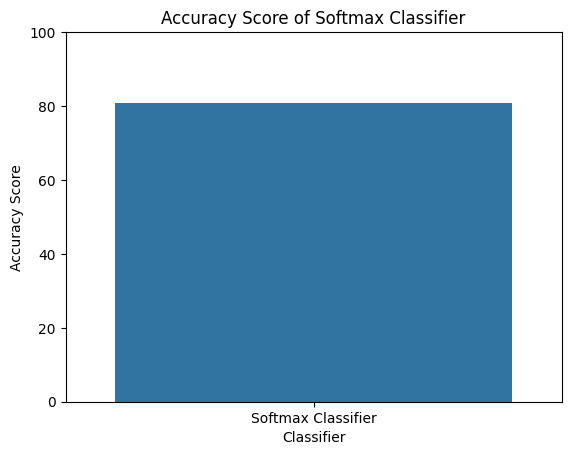

In [ ]:
# Create data for the bar plot
bar_labels = ["Softmax Classifier"]
bar_scores = [accsc]
# Define custom colors for both plots
bar_colors = ['#1F77B4']  # Blue

# Create the bar plot using Seaborn
sns.barplot(x=bar_labels, y=bar_scores, palette=bar_colors)
plt.xlabel("Classifier")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score of Softmax Classifier")
plt.ylim(0, 100)
plt.show()

In [ ]:
#Support Vector Classifier
model_SVC = SVC(kernel='linear', C=1)
model_SVC.fit(X_train,y_train)
print("Accuracy Score of Support Vector Classifier : "+str(accuracy_score(y_test, model_SVC.predict(X_test))*100)+"%")
accsvc=accuracy_score(y_test, model_SVC.predict(X_test))*100

Accuracy Score of Support Vector Classifier : 80.95238095238095%


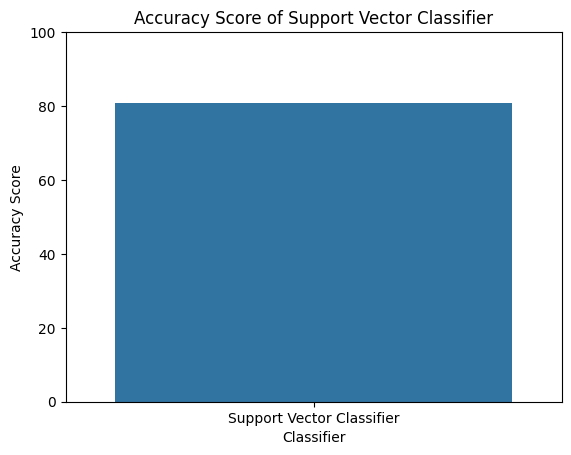

In [ ]:
# Create data for the bar plot
bar_labels = ["Support Vector Classifier"]
bar_scores = [accsvc]
# Define custom colors for both plots
bar_colors = ['#1F77B4']  # Blue

# Create the bar plot using Seaborn
sns.barplot(x=bar_labels, y=bar_scores, palette=bar_colors)
plt.xlabel("Classifier")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score of Support Vector Classifier")
plt.ylim(0, 100)
plt.show()

In [ ]:
#Applying PCA
accuracy_NB = []
accuracy_DT = []
accuracy_SM = []
accuracy_SVC = []
features = []
for i in range(150):
    pca = PCA(n_components=(i+1))
    X_train_pca = pca.fit_transform(X_train)
    x_test_pca = pca.transform(X_test)
    model_NB.fit(X_train_pca, y_train)
    model_SM.fit(X_train_pca, y_train)
    model_SVC.fit(X_train_pca, y_train)
    accuracy_NB.append(accuracy_score(y_test, model_NB.predict(x_test_pca))*100)
    accuracy_SM.append(accuracy_score(y_test, model_SM.predict(x_test_pca))*100)
    features.append(i+1)
    accuracy_SVC.append(accuracy_score(y_test, model_SVC.predict(x_test_pca))*100)

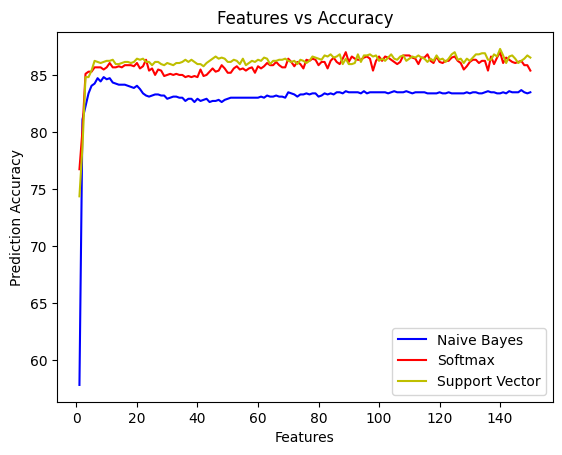

In [ ]:
#Plotting the results
plt.plot(features, accuracy_NB, color='b', label='Naive Bayes')
plt.plot(features, accuracy_SM, color='r', label='Softmax')
plt.plot(features, accuracy_SVC, color='y', label='Support Vector')

plt.xlabel("Features")
plt.ylabel("Prediction Accuracy")
plt.title("Features vs Accuracy")

plt.legend()

plt.show()

In [ ]:
#Applying PCA
accuracy_NB = []
accuracy_DT = []
accuracy_SM = []
accuracy_SVC = []
features = []
for i in range(150,251):
    pca = PCA(n_components=(i+1))
    X_train_pca = pca.fit_transform(X_train)
    x_test_pca = pca.transform(X_test)
    model_NB.fit(X_train_pca, y_train)
    model_SM.fit(X_train_pca, y_train)
    model_SVC.fit(X_train_pca, y_train)
    accuracy_NB.append(accuracy_score(y_test, model_NB.predict(x_test_pca))*100)
    accuracy_SM.append(accuracy_score(y_test, model_SM.predict(x_test_pca))*100)
    features.append(i+1)
    accuracy_SVC.append(accuracy_score(y_test, model_SVC.predict(x_test_pca))*100)

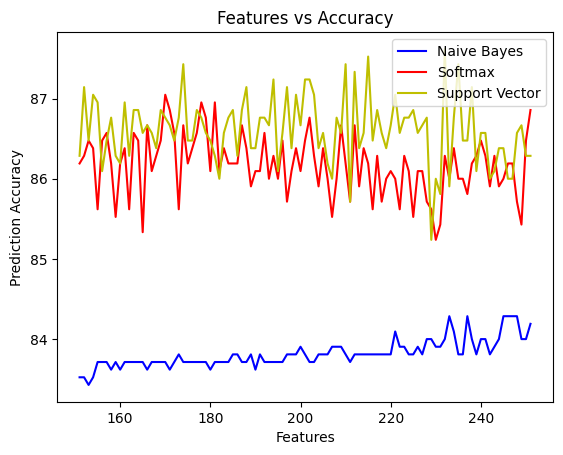

In [ ]:
#Plotting the results
plt.plot(features, accuracy_NB, color='b', label='Naive Bayes')
plt.plot(features, accuracy_SM, color='r', label='Softmax')
plt.plot(features, accuracy_SVC, color='y', label='Support Vector')


plt.xlabel("Features")
plt.ylabel("Prediction Accuracy")
plt.title("Features vs Accuracy")

plt.legend()

plt.show()

In [ ]:
pca = PCA(n_components=207)
X_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)
X_t=pca.transform(Xo_test)
model_SVC.fit(X_train_pca, y_train)
predictions=model_SVC.predict(X_t)
print(accuracy_score(y_test, model_SVC.predict(x_test_pca))*100)
accsvc_pca=accuracy_score(y_test, model_SVC.predict(x_test_pca))*100

86.66666666666667


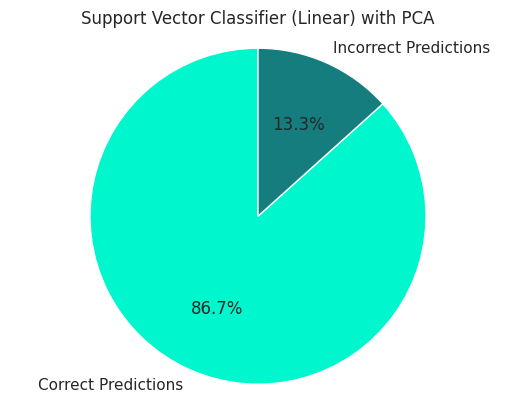

In [ ]:
# Create data for the pie chart
pie_labels = ["Correct Predictions", "Incorrect Predictions"]
pie_sizes = [accsvc_pca, 100 - accsvc_pca]
pie_colors = ['#00F7CE', '#167D7F']

# Create the pie chart using Seaborn
sns.set(style="whitegrid")
plt.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=pie_colors)
plt.axis('equal')
plt.title("Support Vector Classifier (Linear) with PCA")
plt.show()

In [ ]:
X_trains, X_val, y_trains, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.25, random_state=12)

Learning rate:  0.05
Accuracy score (training): 0.803
Accuracy score (validation): 0.796
Learning rate:  0.075
Accuracy score (training): 0.823
Accuracy score (validation): 0.809
Learning rate:  0.1
Accuracy score (training): 0.837
Accuracy score (validation): 0.812
Learning rate:  0.25
Accuracy score (training): 0.889
Accuracy score (validation): 0.830
Learning rate:  0.5
Accuracy score (training): 0.909
Accuracy score (validation): 0.827
Learning rate:  0.63
Accuracy score (training): 0.912
Accuracy score (validation): 0.812
Learning rate:  0.75
Accuracy score (training): 0.917
Accuracy score (validation): 0.808
Learning rate:  1
Accuracy score (training): 0.917
Accuracy score (validation): 0.785


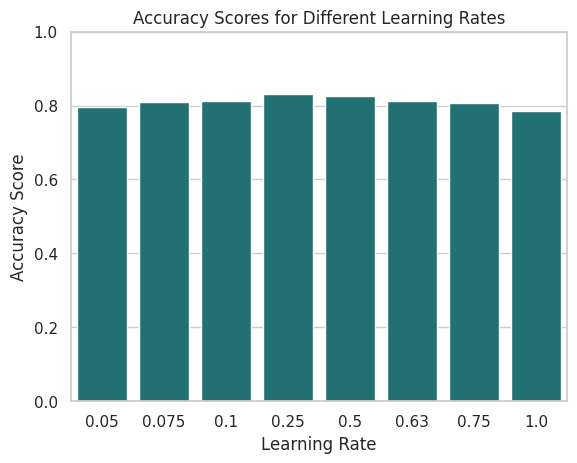

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.63, 0.75, 1]
pca = PCA(n_components=207)
X_trains_pca=pca.fit_transform(X_trains)
X_val_pca=pca.fit_transform(X_val)
accuracy_train = []
accuracy_val = []

# Define custom colors for the bar chart
bar_colors = ['#167D7F'] * len(lr_list)
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=30, learning_rate = learning_rate, max_features=2, max_depth = 3, random_state = 0)
    gb_clf.fit(X_trains, y_trains)
    accuracy_train.append(gb_clf.score(X_trains, y_trains))
    accuracy_val.append(gb_clf.score(X_val, y_val))
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_trains, y_trains)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))
# Create the bar plot using Seaborn
sns.barplot(x=lr_list, y=accuracy_val, palette=bar_colors)
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Different Learning Rates")
plt.ylim(0, 1)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
svm = LinearSVC(max_iter=10000, random_state=42)
model = BaggingClassifier(estimator=svm, n_estimators=40, random_state=42)
model.fit(X_train_pca,y_train)
y_predbag_i=model.predict(x_test_pca)
print(metrics.classification_report(y_test, y_predbag_i, labels=["0",
"1"]))
cm = confusion_matrix(y_test, y_predbag_i)
y_fbag=model.predict(x_test_pca)
X_tab=pca.transform(Xo_test)
y_predbag = model.predict(X_tab)
print ("Confusion Matrix : \n", cm)

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           0       0.88      0.96      0.91       781
           1       0.83      0.61      0.70       269

   micro avg       0.87      0.87      0.87      1050
   macro avg       0.85      0.78      0.81      1050
weighted avg       0.86      0.87      0.86      1050

Confusion Matrix : 
 [[748  33]
 [106 163]]


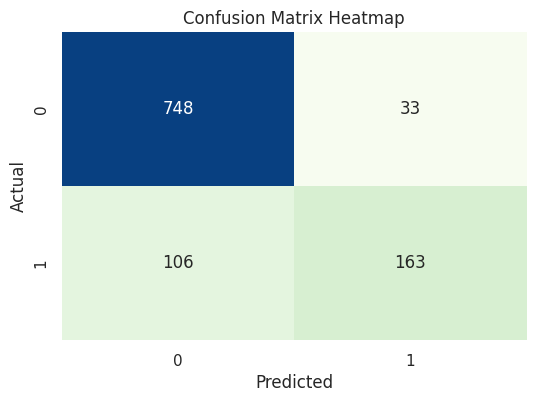

In [ ]:
# Create a heatmap of the confusion matrix using Seaborn
sns.set()
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="GnBu", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=85, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train_pca, y_train)
X_tab=pca.transform(Xo_test)
#Predict the response for test dataset
y_pred_ab=model1.predict(x_test_pca)
y_predab = model1.predict(X_tab)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(y_test, y_pred_ab)
print(metrics.classification_report(y_test, y_pred_ab, labels=["0",
"1"]))

print ("Confusion Matrix : \n", cm)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       781
           1       0.75      0.70      0.73       269

   micro avg       0.86      0.86      0.86      1050
   macro avg       0.83      0.81      0.82      1050
weighted avg       0.86      0.86      0.86      1050

Confusion Matrix : 
 [[719  62]
 [ 80 189]]


/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


              precision    recall  f1-score   support

           0       0.90      0.92      0.91       781
           1       0.75      0.70      0.73       269

   micro avg       0.86      0.86      0.86      1050
   macro avg       0.83      0.81      0.82      1050
weighted avg       0.86      0.86      0.86      1050

Confusion Matrix : 
 [[719  62]
 [ 80 189]]


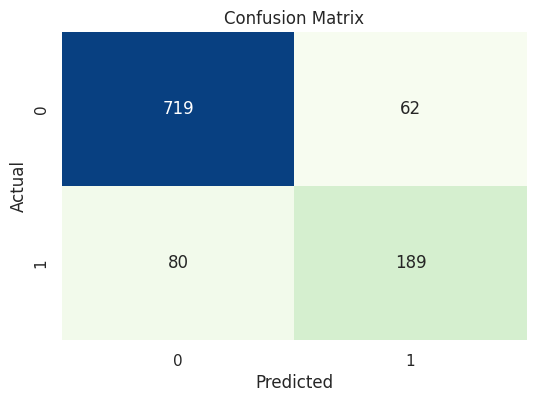

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(y_test, y_pred_ab)
print(metrics.classification_report(y_test, y_pred_ab, labels=["0",
"1"]))

print ("Confusion Matrix : \n", cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="GnBu", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
submission= df_test[["id"]]
submission["labels"]=predictions

<ipython-input-35-bdc8ed509917>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["labels"]=predictions


In [ ]:
submission

,id,labels
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0


In [ ]:
submission.to_csv("submission.csv", index=None)
pd.read_csv("submission.csv")

,id,labels
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0


In [ ]:
submission_ab= df_test[["id"]]
submission_ab["labels"]=y_predab

<ipython-input-38-30ea08fc10f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_ab["labels"]=y_predab


In [ ]:
submission_ab

,id,labels
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0


In [ ]:
submission_ab.to_csv("submission_ab.csv", index=None)
pd.read_csv("submission_ab.csv")

,id,labels
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0


In [ ]:
submission_bag= df_test[["id"]]
submission_bag["labels"]=y_predbag

<ipython-input-41-6ad8e7cd1c40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_bag["labels"]=y_predbag


In [ ]:
submission_bag

,id,labels
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0


In [ ]:
submission_bag.to_csv("submission_bag.csv", index=None)
pd.read_csv("submission_bag.csv")

,id,labels
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0
